### exercise 2 classification 
### nearest neighbor and QDA 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
# n_samples default = 100
# n_features = n_informative + n_redundant + n_repeated + useless features drawn at random
# n_classes default = 2 
# random_state: set a seed to the random generator
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
print(X[:5])
print(y[:5])

rng = np.random.RandomState(2) # seed = 2 
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

# n_samples default = 100
moons = make_moons(noise=0.3, random_state=0)

# n_samples default = 100 
circles = make_circles(noise=0.2, factor=0.5, random_state=1)

datasets = [moons, circles, linearly_separable]

[[-1.04948638  0.8786438 ]
 [ 0.8780991   0.89551051]
 [ 0.95928819  1.03967316]
 [-1.18013412  1.12062155]
 [-0.90731836  1.06040861]]
[1 0 0 1 1]


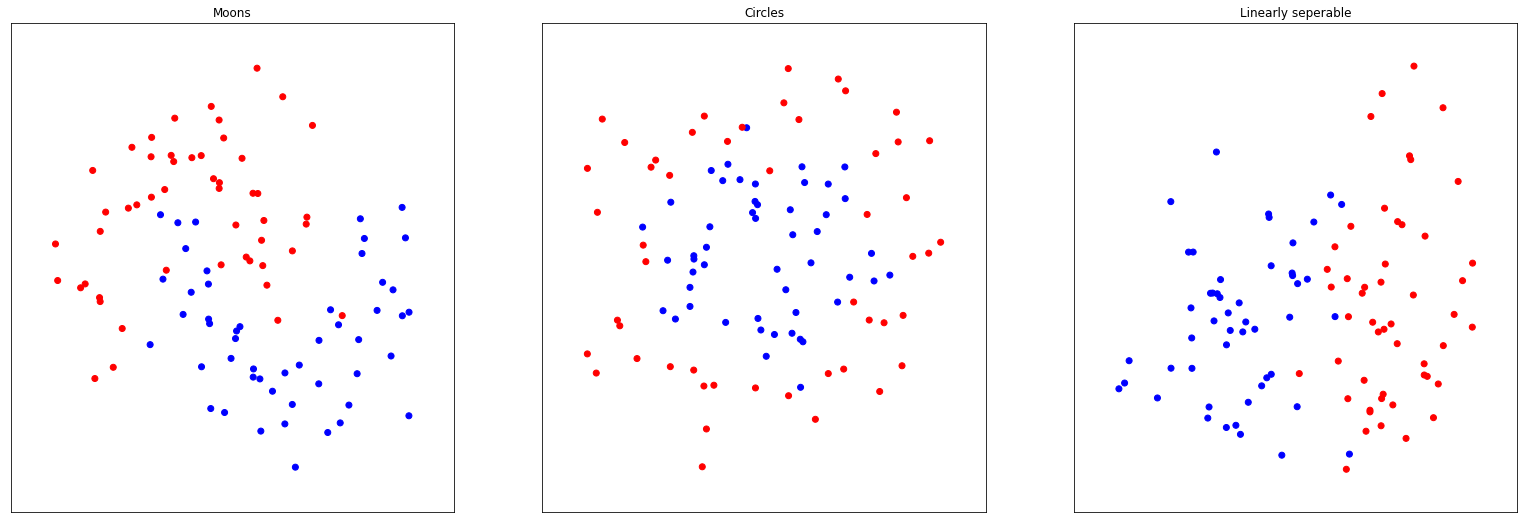

In [3]:
figure = plt.figure(figsize=(27, 9))

for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    # scale everything to unit variance with the std standard scaler (std normal distribution)
    X = StandardScaler().fit_transform(X) 
    
    # define a colormap (in this case the map includes 'red' and 'blue')
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(1, len(datasets), ds_cnt+1) # subplot(n_rows, n_columns, position)
    
    # define the title of the subplot
    if ds_cnt == 0:
        ax.set_title("Moons")
    elif ds_cnt == 1:
        ax.set_title("Circles")
    else:
        ax.set_title("Linearly seperable")
    
    # add the data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    
    # set the xlim and ylim
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    ax.set_xlim(x1_min, x1_max)
    ax.set_ylim(x2_min, x2_max)
    
    ax.set_xticks(())
    ax.set_yticks(())

In [4]:
names = ["Nearest Neighbors", "QDA"]

classifiers = [KNeighborsClassifier(3), QuadraticDiscriminantAnalysis()]

print(classifiers)

[KNeighborsClassifier(n_neighbors=3), QuadraticDiscriminantAnalysis()]


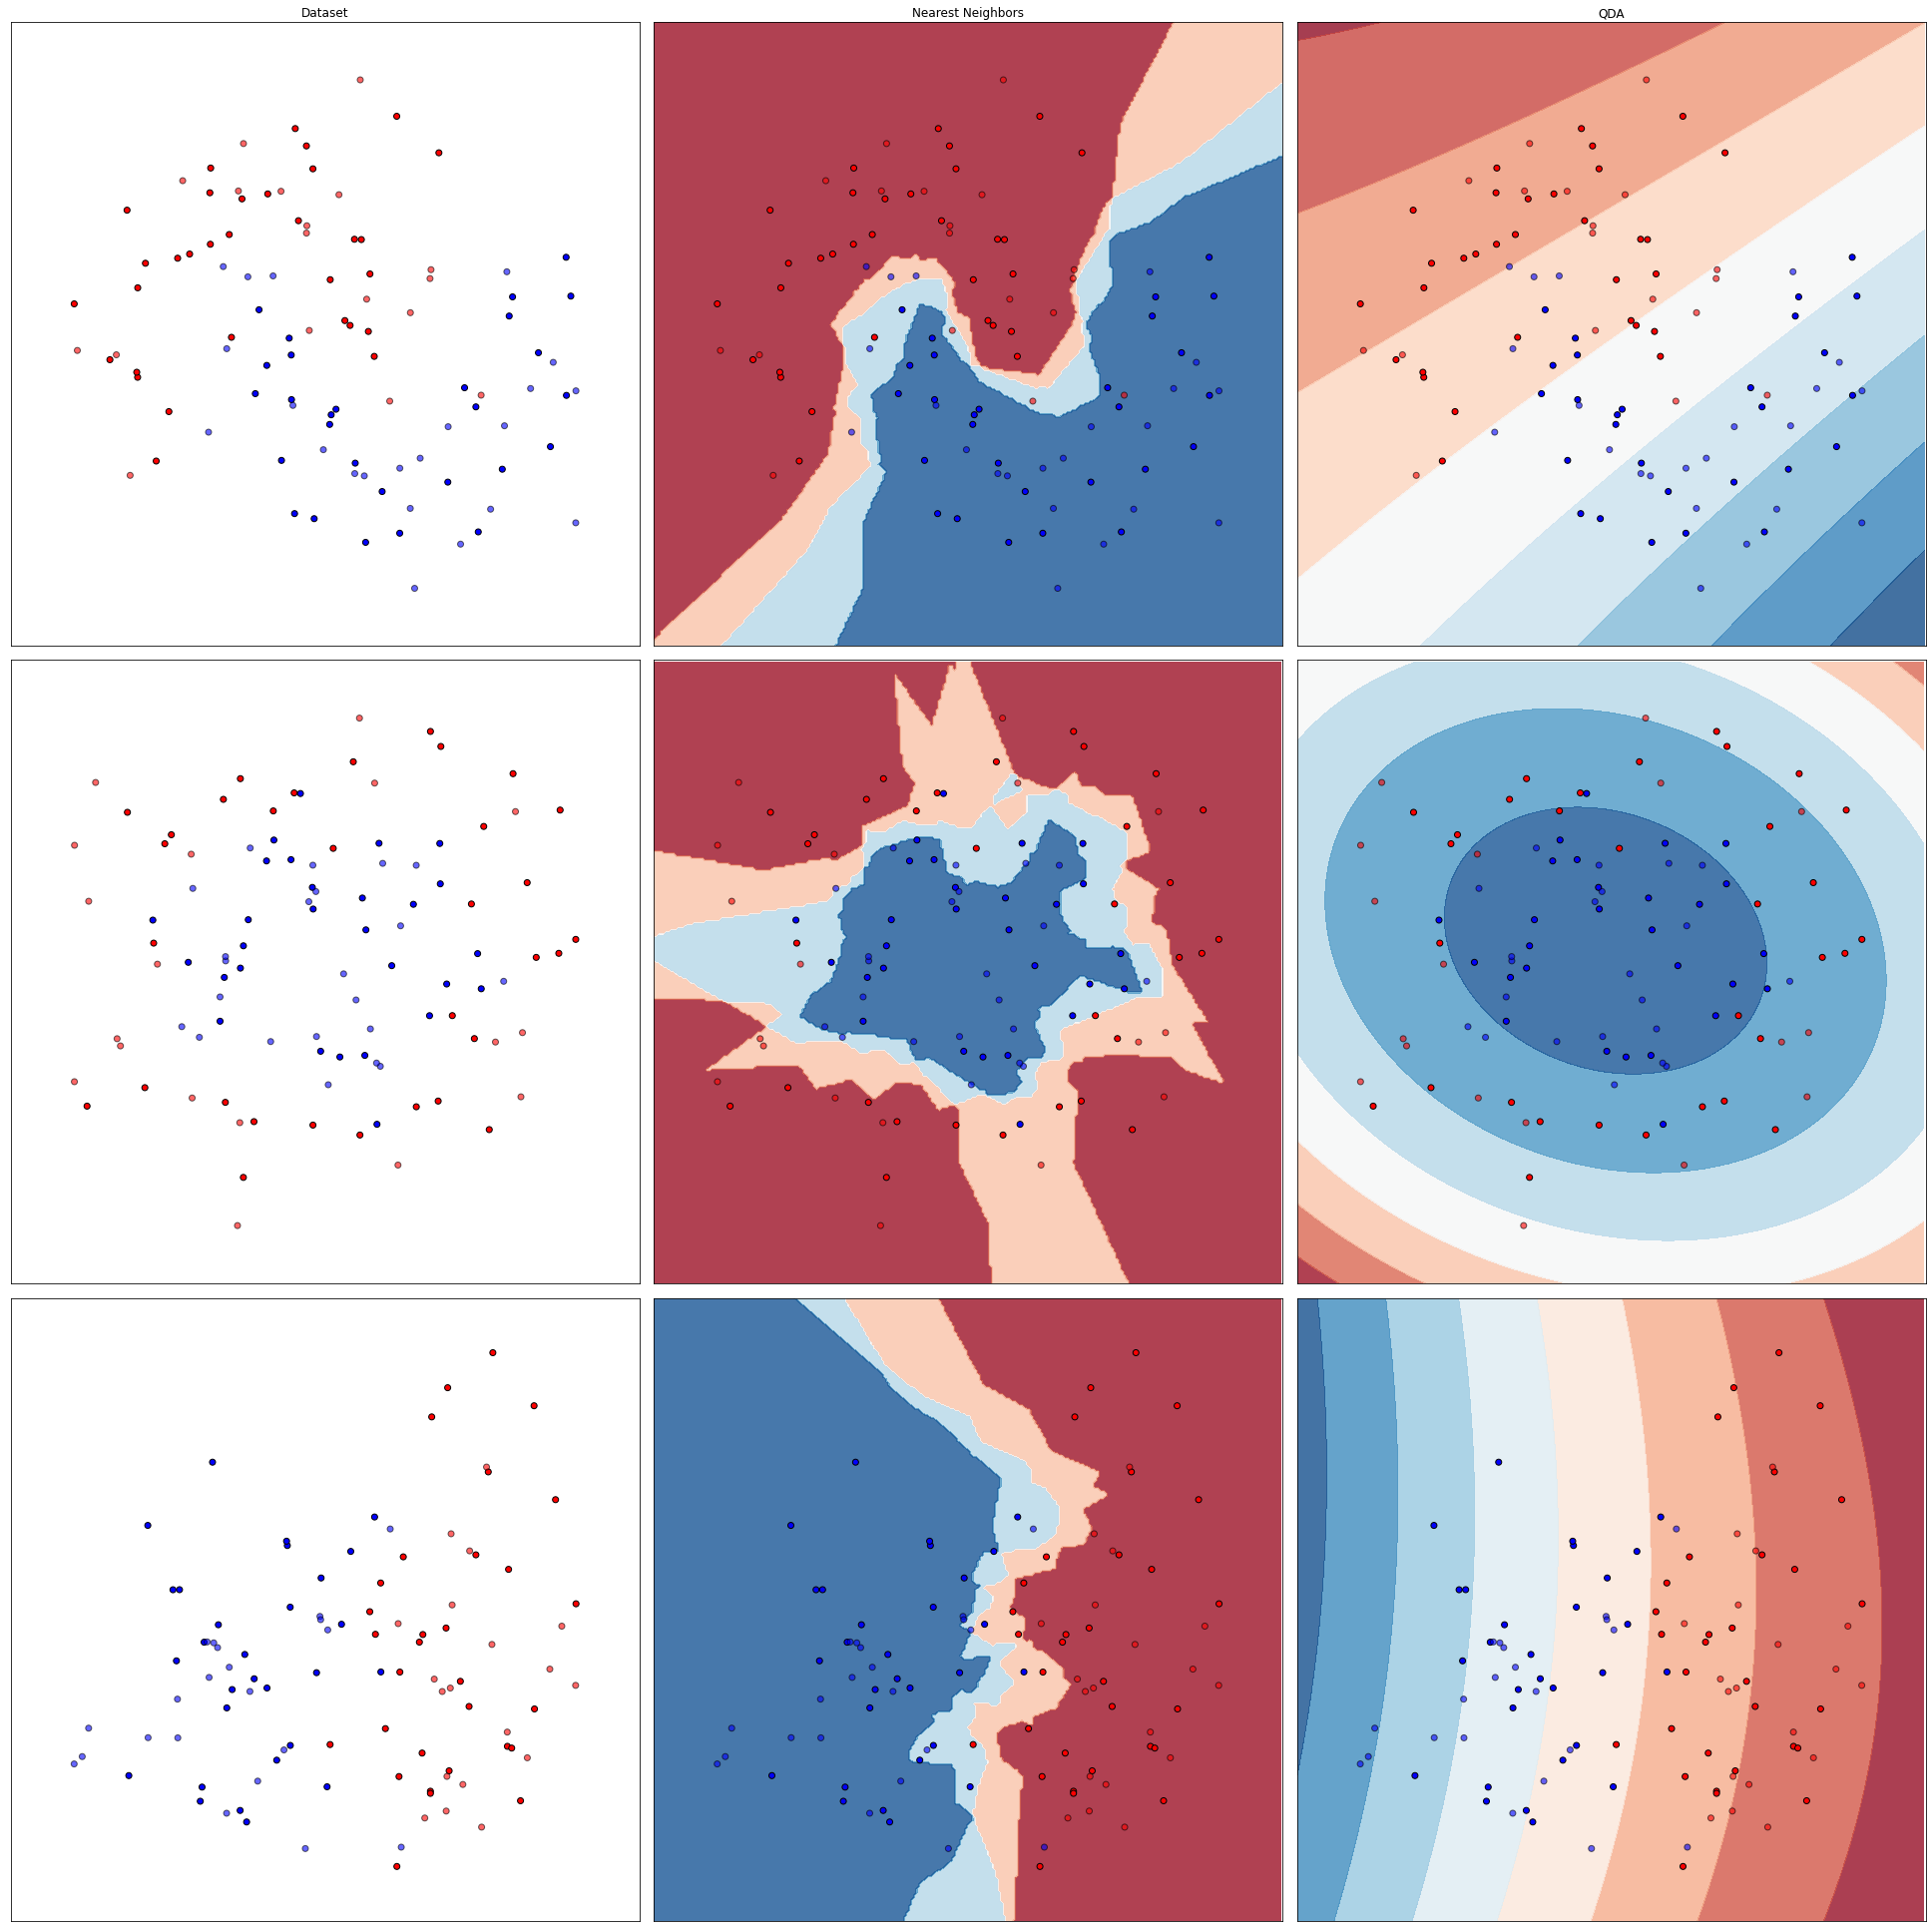

In [5]:
figure = plt.figure(figsize=(27, 27))

# i refers to the subplot
i = 1 

for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    # scale everything to unit variance with the std standard scaler (std normal distribution)
    X = StandardScaler().fit_transform(X) 
    
    # test_size is the proportion of the dataset to include in the test split
    # random_state is the seed used by random number generator
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
    
    # define the min and max x1 and x2 coordinates
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # create a grid with a stepsize of 0.02
    x1_grid, x2_grid = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))

    # define a colormap (in this case the map includes 'red' and 'blue')
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    
    if ds_cnt == 0:
        ax.set_title("Dataset")
        
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
    
    ax.set_xlim(x1_min, x1_max)
    ax.set_ylim(x2_min, x2_max)
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1 #now we have to go on with classifiers

    for name, clf in zip(names, classifiers):
        
        # Apply the classifier to the training set
        clf.fit(X_train, y_train)
        # Compute the score on the test set
        score = clf.score(X_test, y_test) 
        
        # QuadraticDiscriminantAnalysis() has this attribute
        if hasattr(clf, "decision_function"):  
            # np.c_: merge two matrix horizontally 
            # ravel: multi-dimensional array -> one-dimensional array 
            Z = clf.decision_function(np.c_[x1_grid.ravel(), x2_grid.ravel()])
        else:
            Z = clf.predict_proba(np.c_[x1_grid.ravel(), x2_grid.ravel()])[:, 1]

        
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        cm = plt.cm.RdBu # https://matplotlib.org/examples/color/colormaps_reference.html
        Z = Z.reshape(x1_grid.shape)
        ax.contourf(x1_grid, x2_grid, Z, cmap=cm, alpha=0.8)

        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)

        ax.set_xlim(x1_min, x1_max)
        ax.set_ylim(x2_min, x2_max)
        ax.set_xticks(())
        ax.set_yticks(())
        
        if ds_cnt == 0:
            ax.set_title(name)

        i += 1

plt.tight_layout()